In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [3]:
# 下載 data
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [4]:
# 載入 data
# def load_housing_data(housing_path=HOUSING_PATH):
#     csv_path = os.path.join(housing_path, "housing.csv")
#     return pd.read_csv(csv_path)

housing = pd.read_csv("housing.csv")

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
len(housing)

20640

In [6]:
# data exploration
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# 分割 test set 與 train set
def split_train_test(data, test_ratio):
    
    # 以np.random.permutation打亂index的順序，設成shuffle_indices
    shuffle_indices = np.random.permutation(len(data))
    
    # 自訂測試比例
    test_set_size = int(len(data) * test_ratio)
    
    # 定義 test set 與 train set 各自的index(來自shuffle_indices)
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]
    
    # 回傳 test set 與 train set
    return data.iloc[test_indices], data.iloc[train_indices]

In [10]:
print(np.random.permutation(5))
print(np.random.permutation(5))
print(np.random.permutation(5))

[1 4 2 0 3]
[3 1 2 0 4]
[1 0 3 4 2]


In [11]:
# 每次呼叫split_train_test所產生的index順序皆不相同，故test_set, train_set亦不同
test_set, train_set = split_train_test(housing, 0.2)
print(test_set.index[:5], train_set.index[:5])
print("重新呼叫")
test_set, train_set = split_train_test(housing, 0.2)
print(test_set.index[:5], train_set.index[:5])

Int64Index([8517, 17348, 2090, 20587, 960], dtype='int64') Int64Index([14834, 1783, 18674, 0, 14961], dtype='int64')
重新呼叫
Int64Index([6474, 12301, 2635, 1301, 3551], dtype='int64') Int64Index([9840, 9882, 9864, 4203, 1217], dtype='int64')


In [75]:
test_set, train_set = split_train_test(housing, 0.2)

In [21]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12833,-121.41,38.69,28.0,1601.0,308.0,848.0,305.0,3.6429,105200.0,INLAND
18155,-122.06,37.35,31.0,1795.0,281.0,872.0,282.0,8.0599,381800.0,<1H OCEAN
6640,-118.15,34.16,52.0,1925.0,597.0,2258.0,594.0,1.6921,162500.0,<1H OCEAN
8799,-118.37,33.77,26.0,6339.0,876.0,2540.0,880.0,10.1447,500001.0,NEAR OCEAN
12964,-121.31,38.71,18.0,3998.0,744.0,2071.0,660.0,4.3836,102000.0,INLAND


In [22]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7211,-118.17,34.03,42.0,882.0,292.0,1248.0,281.0,2.7610,120000.0,<1H OCEAN
13106,-121.37,38.41,14.0,3727.0,685.0,1741.0,646.0,3.5625,125700.0,INLAND
4781,-118.32,34.04,44.0,1008.0,223.0,544.0,223.0,2.8654,176800.0,<1H OCEAN
15943,-122.43,37.72,50.0,2912.0,562.0,1989.0,537.0,3.6667,252600.0,NEAR BAY
14704,-117.07,32.81,15.0,2000.0,402.0,778.0,369.0,4.3594,224200.0,<1H OCEAN


In [12]:
# 使用 crc32 以確保每次所產生 test set 與 train set 會一致

from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# 用 index 來做為 identifier
def split_train_test_by_id(data, test_ratio, id_column):
    # 指定 data 中的某一列為 ids
    ids = data[id_column]
    # apply ids on test_set_check，並將調整過的 ids 再指定給 in_test_set
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    # 回傳 test set 與 train set
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
# 讓原 index 成為第一行|
housing_with_id = housing.reset_index()
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
# 使用 split_train_test_by_id 來分割 housing_with_id
# 每次呼叫split_train_test_by_id所產生的index順序皆相同，故test_set, train_set亦同
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(test_set.index[:5], train_set.index[:5])
print("重新呼叫")
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(test_set.index[:5], train_set.index[:5])

Int64Index([2, 5, 12, 16, 23], dtype='int64') Int64Index([0, 1, 3, 4, 6], dtype='int64')
重新呼叫
Int64Index([2, 5, 12, 16, 23], dtype='int64') Int64Index([0, 1, 3, 4, 6], dtype='int64')


In [79]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [27]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [28]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [80]:
# 使用經緯度產生 index
housing_with_id['id'] = housing["longitude"] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [30]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [31]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [17]:
# 使用 sklearn 內建函式分割 test set 與 train set
from sklearn.model_selection import train_test_split
# reference: https://blog.csdn.net/cherdw/article/details/54881167

In [18]:
# 若random_state值相同，每次呼叫train_test_split所產生的index順序皆相同，故test_set, train_set亦同
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(test_set.index[:5], train_set.index[:5])
print("重新呼叫")
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(test_set.index[:5], train_set.index[:5])
print("改變random_state值")
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=43)
print(test_set.index[:5], train_set.index[:5])

Int64Index([20046, 3024, 15663, 20484, 9814], dtype='int64') Int64Index([14196, 8267, 17445, 14265, 2271], dtype='int64')
重新呼叫
Int64Index([20046, 3024, 15663, 20484, 9814], dtype='int64') Int64Index([14196, 8267, 17445, 14265, 2271], dtype='int64')
改變random_state值
Int64Index([7310, 4402, 1929, 11551, 9882], dtype='int64') Int64Index([72, 2602, 19784, 3405, 12492], dtype='int64')


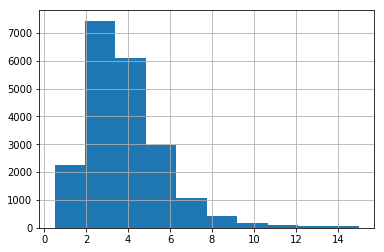

In [19]:
housing["median_income"].hist()

In [20]:
# 分層劃分數據集

# 將 median_income 除以 1.5 再無條件進位，並指派給 income_cat
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# 將 income_cat 中大於 5 的都置換為 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

from sklearn.model_selection import StratifiedShuffleSplit

# 以 StratifiedShuffleSplit 分割 test set 與 train set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
# reference: https://www.cnblogs.com/nolonely/p/7007432.html

In [21]:
print(housing["median_income"][:5])
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
print(housing["income_cat"][:5])
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
print(housing["income_cat"][:5])

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64
0    6.0
1    6.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64
0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64


In [37]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
X=np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12]])
y=np.array([1,2,1,2,1,2])
sss=StratifiedShuffleSplit(n_splits=3,test_size=.5,random_state=0)
sss.get_n_splits(X,y)
print(sss)
for train_index,test_index in sss.split(X,y):
    print("Train Index:",train_index,",Test Index:",test_index)
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    print(X_train)
    print(X_test)
    print(y_train)
    print(y_test)

StratifiedShuffleSplit(n_splits=3, random_state=0, test_size=0.5,
            train_size=None)
Train Index: [5 4 1] ,Test Index: [3 2 0]
[[11 12]
 [ 9 10]
 [ 3  4]]
[[7 8]
 [5 6]
 [1 2]]
[2 1 2]
[2 1 1]
Train Index: [5 2 3] ,Test Index: [0 4 1]
[[11 12]
 [ 5  6]
 [ 7  8]]
[[ 1  2]
 [ 9 10]
 [ 3  4]]
[2 1 2]
[1 1 2]
Train Index: [5 0 4] ,Test Index: [3 1 2]
[[11 12]
 [ 1  2]
 [ 9 10]]
[[7 8]
 [3 4]
 [5 6]]
[2 1 1]
[2 2 1]


In [38]:
print(strat_train_set[:5])
print(strat_train_set['income_cat'].value_counts() / len(strat_train_set))
print(strat_test_set[:5])
print(strat_test_set['income_cat'].value_counts() / len(strat_test_set))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  median_house_value  \
17606       710.0       339.0         2.7042            286600.0   
18632       306.0       113.0         6.4214            340600.0   
14650       936.0       462.0         2.8621            196900.0   
3230       1460.0       353.0         1.8839             46300.0   
3555       4459.0      1463.0         3.0347            254500.0   

      ocean_proximity  income_cat  
17606       <1H OCEAN         2.0  
18632       <1H OCEAN         5.0  
14650   

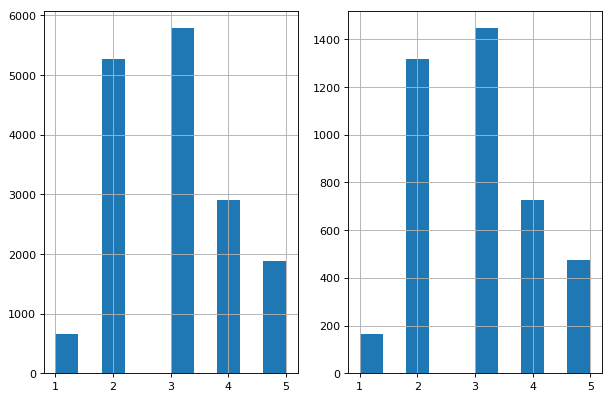

In [22]:
from matplotlib.pyplot import *
figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
strat_train_set['income_cat'].hist()
plt.subplot(1,2,2)
strat_test_set['income_cat'].hist()

In [40]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [38]:
# 移除暫時標籤
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

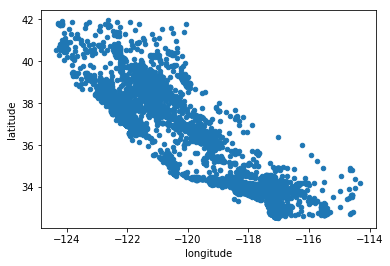

In [23]:
# 視覺化
from matplotlib.pyplot import *
import seaborn as sns
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")

c:\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


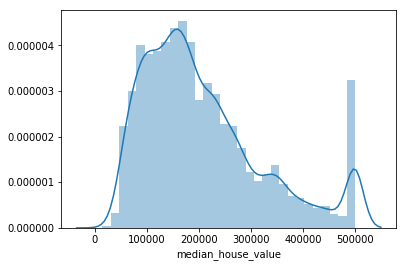

In [24]:
sns.distplot(housing['median_house_value'],bins=30)

c:\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


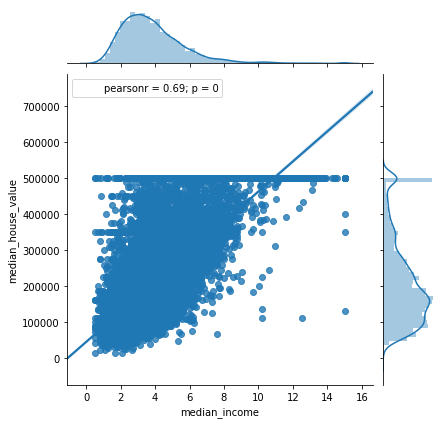

In [25]:
sns.jointplot(x='median_income',y='median_house_value',data=housing,kind='reg')

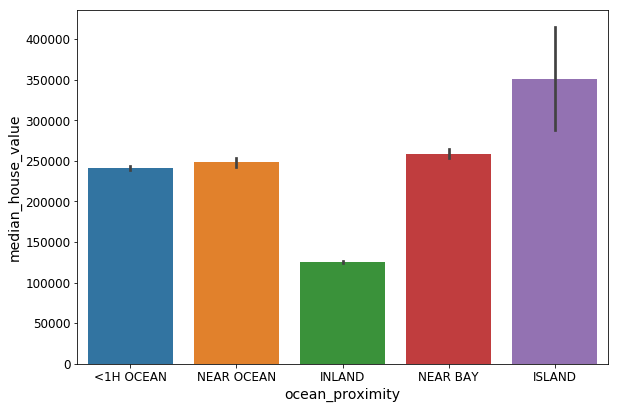

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(9.5, 6.5)
sns.barplot(x='ocean_proximity',y='median_house_value',data=housing)

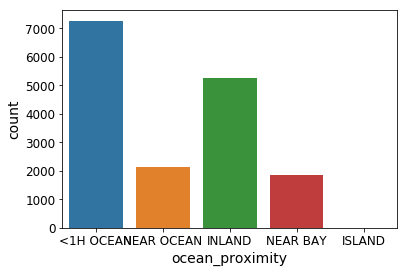

In [38]:
sns.countplot(x='ocean_proximity',data=housing)

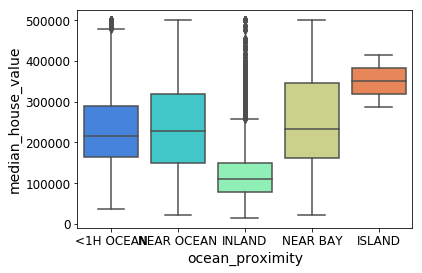

In [39]:
sns.boxplot(x='ocean_proximity',y='median_house_value',data=housing,palette='rainbow')

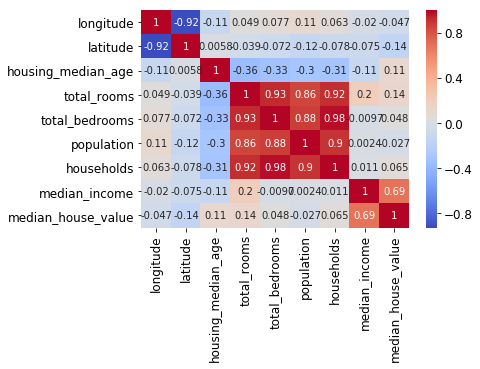

In [44]:
sns.heatmap(housing.corr(),cmap='coolwarm',annot=True)

In [50]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [86]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

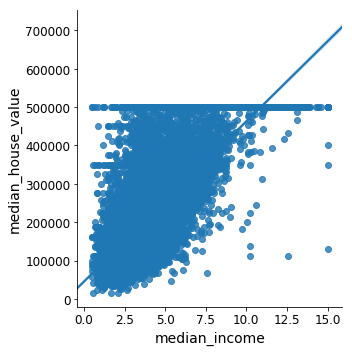

In [47]:
sns.lmplot(x='median_income',y='median_house_value',data=housing)

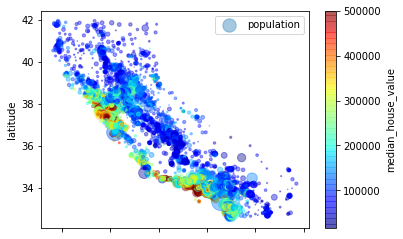

In [15]:
# 很屌版本
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [52]:
# 準備 machine learnig 演算法
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [53]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [56]:
len(housing_labels)

16512

In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [94]:
# Data Cleaning
# 添補遺漏值
# 一般作法:housing["total_bedrooms"].fillna(median)

In [57]:
# 酷方式
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [96]:
# 驗證計算中位數結果是否相同
print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [58]:
# 將轉換過的資料製成新的DataFrame
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [59]:
# 檢查添補之結果
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [30]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0


In [ ]:
# 以下為書中之作法

In [53]:
# Handling Text and Categorical Attributes
# Part 1 - 類別轉數字
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [54]:
# 單純轉換為數字可能會有演算法上的問題
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int32)

In [55]:
# Part 2 - One hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [56]:
# 轉換結果
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [57]:
# 將 Part 1&2 合起來
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]], dtype=int32)

In [ ]:
# Feature Scaling

In [58]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [89]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self # nothing else to do

    def transform(self, X, y=None):
        rooms_per_household      = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, 
                         rooms_per_household, 
                         population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, 
                         rooms_per_household, 
                         population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

housing_extra_attribs = attr_adder.transform(housing.values)

In [90]:
# Transformation Pipelines - 連續進行多種轉換
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn_features.transformers import DataFrameSelector

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector',      DataFrameSelector(num_attribs)),
    ('imputer',       Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler',    StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('selector',      DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer()),
])

full_pipeline = FeatureUnion(transformer_list =[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [ ]:
# 以下為類別直接轉換之方式

In [31]:
pd.get_dummies(housing['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,1,0,0,0,0
18632,1,0,0,0,0
14650,0,0,0,0,1
3230,0,1,0,0,0
3555,1,0,0,0,0


In [60]:
pd.get_dummies(housing['ocean_proximity'],drop_first=True).head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,0,0,0,0
18632,0,0,0,0
14650,0,0,0,1
3230,1,0,0,0
3555,0,0,0,0


In [61]:
houseCat = pd.get_dummies(housing['ocean_proximity'],drop_first=True)

In [62]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [63]:
housing_tr.to_csv('housing_tr.csv', index=False)
houseCat.to_csv('houseCat.csv', index=False)
housing_tr = pd.read_csv('housing_tr.csv')
houseCat = pd.read_csv('houseCat.csv')
df = pd.concat([housing_tr, houseCat], axis = 1)
df.to_csv('df.csv', index=False)

In [66]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,0,0,0,0
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,0,0,0,0
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,0,0,0,1
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,1,0,0,0
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,0,0,0,0


In [67]:
# Select and Train a Model
# Training and Evaluating on the Training Set
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
# 測試預測
some_data = df.iloc[:5]
some_labels = housing_labels.iloc[:5]
print("Predictions:\t", lin_reg.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [211574.39523833 321345.10513719 210947.519838    61921.01197837
 192362.32961119]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [69]:
predictions = lin_reg.predict(df)

c:\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


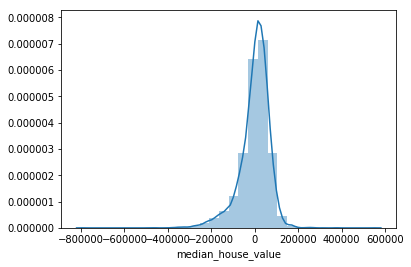

In [70]:
sns.distplot(predictions-housing_labels,bins=30)

In [125]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(housing_labels, predictions))
print('MSE:', metrics.mean_squared_error(housing_labels, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(housing_labels, predictions)))

MAE: 49906.941422232994
MSE: 4768038085.119673
RMSE: 69050.98178244587


In [126]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(df, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [127]:
predictions = tree_reg.predict(df)
print('MAE:', metrics.mean_absolute_error(housing_labels, predictions))
print('MSE:', metrics.mean_squared_error(housing_labels, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(housing_labels, predictions)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [128]:
# Use K-fold cross-validation
# Train & eval Decision Tree model against 10 splits of training dataset
# Returns 10 evaluation scores.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    tree_reg, 
    df, 
    housing_labels,
    scoring="neg_mean_squared_error", 
    cv=10)

rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(rmse_scores)

Scores: [67097.6075506  66023.20662277 73052.78973199 69862.64548699
 69218.24893238 74602.94889893 66761.25602316 69733.18000333
 70466.18492304 68550.23396946]
Mean: 69536.83021426217
Standard deviation: 2571.18601200115


In [129]:
# So, Decision Tree RMSE: mean ~71097, stdev 2165 (still sucks.)
# compare to earlier Linear Regression:

lin_scores = cross_val_score(
    lin_reg,
    df,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [67450.42057782 67329.50264436 68361.84864912 74639.88837894
 68314.56738182 71628.61410355 65361.14176205 68571.62738037
 72476.18028894 68098.06828865]
Mean: 69223.18594556316
Standard deviation: 2657.2683112778363


In [131]:
# Yep, DT overfit is just about as bad. (RMSE mean 69052, stdev 2731)
# Let's try a RandomForest.

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(df, housing_labels)

forest_scores = cross_val_score(
    forest_reg,
    df,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [50657.87622085 47813.86569452 52087.17698605 53068.83044292
 50330.39020743 54920.46762136 51171.86785427 52177.3972376
 54014.830978   52132.52361305]
Mean: 51837.52268560469
Standard deviation: 1905.8366462856823


In [132]:
# Fine-Tuning Model with Grid Search of Hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 
     'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], # bootstrap = True = default setting
     'n_estimators': [3, 10], 
     'max_features': [2, 3, 4]},
]

forest_reg  = RandomForestRegressor()

grid_search = GridSearchCV(
    forest_reg, 
    param_grid, 
    cv=5,
    scoring = 'neg_mean_squared_error')

grid_search.fit(df, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [133]:
# Best combination of parameters?
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [134]:
# Best estimator?
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [135]:
# Evaluation scores:

cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],
                              cvres["params"]):
    print(np.sqrt(-mean_score), params)

63948.33222557573 {'max_features': 2, 'n_estimators': 3}
54740.738623454155 {'max_features': 2, 'n_estimators': 10}
52846.57871561154 {'max_features': 2, 'n_estimators': 30}
60055.599029044155 {'max_features': 4, 'n_estimators': 3}
52801.97855024419 {'max_features': 4, 'n_estimators': 10}
50635.24588440334 {'max_features': 4, 'n_estimators': 30}
59059.30700139014 {'max_features': 6, 'n_estimators': 3}
52512.20660456081 {'max_features': 6, 'n_estimators': 10}
50414.37232585478 {'max_features': 6, 'n_estimators': 30}
57953.068936658536 {'max_features': 8, 'n_estimators': 3}
52003.716140228884 {'max_features': 8, 'n_estimators': 10}
50374.7642046048 {'max_features': 8, 'n_estimators': 30}
62267.33446058354 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54529.77096587297 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60696.08377256117 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53142.11992372318 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [136]:
# best solution:
# max_features = 6, n_estimators = 30 (RMSE ~49,960)
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.10559163e-01, 1.05215740e-01, 5.07145617e-02, 3.25681581e-02,
       2.82508884e-02, 3.98550236e-02, 2.49678209e-02, 4.49078430e-01,
       1.49675838e-01, 6.21609326e-05, 1.57542027e-03, 7.47679476e-03])

In [137]:
# display feature "importance" scores next to their names:

extra_attribs       = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes          = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.4490784302434759, 'median_income'),
 (0.14967583770321496, 'rooms_per_hhold'),
 (0.11055916321617953, 'longitude'),
 (0.10521574023639099, 'latitude'),
 (0.05071456169991329, 'housing_median_age'),
 (0.03985502357901287, 'population'),
 (0.032568158064252686, 'total_rooms'),
 (0.028250888400778062, 'total_bedrooms'),
 (0.024967820895796862, 'households'),
 (0.007476794756164815, '<1H OCEAN'),
 (0.00157542027219905, 'bedrooms_per_room'),
 (6.216093262097592e-05, 'pop_per_hhold')]

In [140]:
from sklearn.metrics import mean_squared_error
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(df)
final_mse = mean_squared_error(housing_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

19339.56789065989